In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [8]:
import pandas as pd

In [9]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [12]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
x=df.iloc[:,[3,4]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [14]:
from sklearn.cluster import KMeans
lst = [] # first create empty list
for i in range(1,11): #i=no.of clusters
    data=KMeans(n_clusters=i,init="k-means++",random_state=42)
    data.fit(x)
    lst.append(data.inertia_) #inetia---->varience
#append means add value

In [15]:
print(lst)

[269981.28, 183653.3289473684, 106348.37306211119, 73880.64496247195, 44448.45544793371, 40825.16946386946, 33642.579220779226, 26686.83778518778, 24766.471609793443, 23103.122085983916]


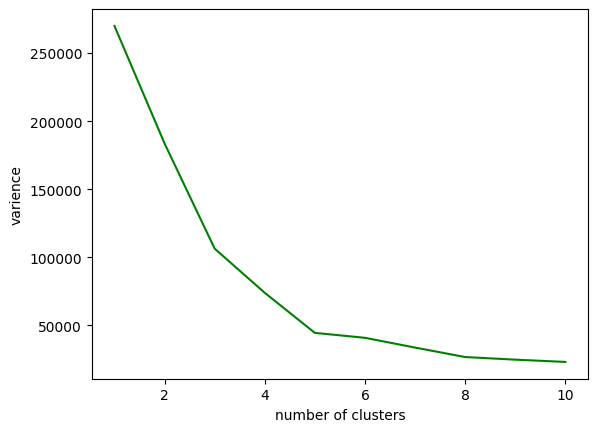

In [25]:
plt.plot(range(1,11),lst,color='g')
plt.xlabel('number of clusters')
plt.ylabel('varience')
plt.show()

In [17]:
#here 5 is elbow  point

data1=KMeans(n_clusters=5,init="k-means++",random_state=42)
y_data=data1.fit_predict(x)
y_data
#cluster form cheythu

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [18]:
x['cluster']=y_data
x

C:\Users\HP\AppData\Local\Temp\ipykernel_14296\1356581347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster']=y_data


,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


In [19]:
x1=x.iloc[:,:-1].values
y1=x.iloc[:,-1].values

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array([0, 2, 4, 3, 3, 0, 0, 3, 3, 0, 0, 3, 1, 0, 3, 1, 0, 3, 0, 0, 0, 4,
       3, 0, 0, 0, 0, 0, 1, 0, 2, 4, 0, 0, 3, 0, 1, 1, 3, 0, 0, 1, 4, 4,
       0, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 3, 0, 3, 0], dtype=int32)

In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9666666666666667


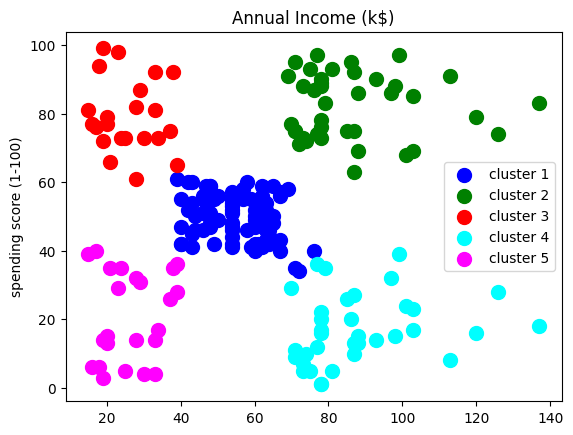

In [24]:
#visualizing the cluster

plt.scatter(x.iloc[y_data == 0, 0],x.iloc[y_data == 0, 1], s = 100, c = 'blue',label = 'cluster 1') #for first cluster
plt.scatter(x.iloc[y_data == 1, 0],x.iloc[y_data == 1, 1], s = 100, c = 'green',label = 'cluster 2') #second first cluster
plt.scatter(x.iloc[y_data == 2, 0],x.iloc[y_data == 2, 1], s = 100, c = 'red',label = 'cluster 3') #third first cluster
plt.scatter(x.iloc[y_data == 3, 0],x.iloc[y_data == 3, 1], s = 100, c = 'cyan',label = 'cluster 4') #four first cluster
plt.scatter(x.iloc[y_data == 4, 0],x.iloc[y_data == 4, 1], s = 100, c = 'magenta',label = 'cluster 5') #four first cluster


plt.title('clusters of customer')
plt.title('Annual Income (k$)')
plt.ylabel('spending score (1-100)')
plt.legend()
plt.show()
